In [1]:
import numpy as np # linear algebra
import pandas as pd

In [2]:
from __future__ import print_function
from keras.preprocessing.text import text_to_word_sequence
import pandas as pd
from keras.preprocessing.text import Tokenizer
import numpy as np
from bs4 import BeautifulSoup
import logging
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, MaxPooling1D, Flatten
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.regularizers import l2

C:\Users\guris\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "
C:\Users\guris\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [3]:
data = pd.read_csv('fake reviews dataset.csv')

In [4]:
data.head()

,category,rating,label,text
0,Home_and_Kitchen_5,positive,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,positive,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,positive,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,negative,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,positive,CG,Very nice set. Good quality. We have had the s...


In [5]:
df = data[['label','rating','text']]                           


In [6]:
df1 = df.sample(frac=1)


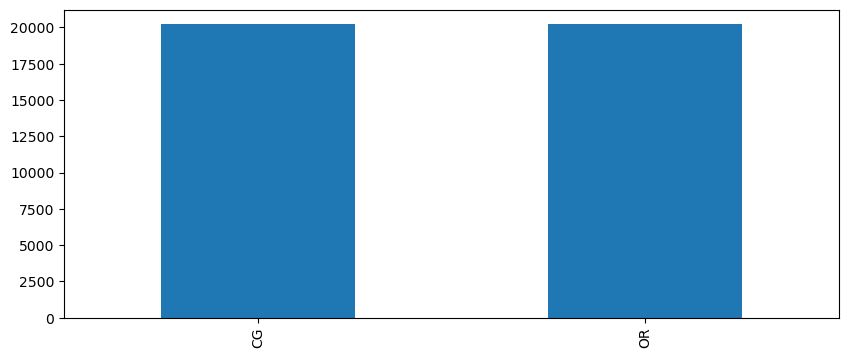

In [7]:
import matplotlib.pyplot as plt 
my_tags = ['CG','OR']
plt.figure(figsize=(10,4))
df1.label.value_counts().plot(kind='bar');

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40432 entries, 5060 to 12927
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   40432 non-null  object
 1   rating  40432 non-null  object
 2   text    40432 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


In [10]:
df1.head()

,label,rating,text
5060,OR,positive,"Very nice, good weight, better than the other ..."
24354,CG,positive,"I love this author and this series, she has a ..."
39364,OR,positive,Loved the shoe and loved the price! I was hes...
10891,OR,positive,Best pocket radio I've owned so far. My only c...
11736,CG,negative,"As the owner of a small business, the only thi..."


In [11]:
df2=df1.drop(columns=['rating'],axis=1)

In [12]:
df2.describe()


,label,text
count,40432,40432
unique,2,40412
top,CG,My 19 month old son loves it and the materials...
freq,20216,2


In [13]:
# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'species'. 
df2['label']= label_encoder.fit_transform(df2['label']) 

df2['label'].unique() 

array([1, 0])

In [14]:
df2.head()

,label,text
5060,1,"Very nice, good weight, better than the other ..."
24354,0,"I love this author and this series, she has a ..."
39364,1,Loved the shoe and loved the price! I was hes...
10891,1,Best pocket radio I've owned so far. My only c...
11736,0,"As the owner of a small business, the only thi..."


In [15]:
df2.describe()


,label
count,40432.000000
mean,0.500000
std,0.500006
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [16]:
from nltk.corpus import stopwords


In [17]:
import re


In [18]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower().split()
    text = " ".join(text)
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+\-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)

    return text
    
df2['text'] = df2['text'].apply(clean_text)

C:\Users\guris\AppData\Local\Temp\ipykernel_12096\783534621.py:11: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "lxml").text # HTML decoding


In [19]:
X = df2.text
y = df2.label

In [20]:
X = X.map(lambda a: clean_text(a))


In [21]:
def text_to_wordlist(text):    
    #Remove Special Characters
    text = re.sub(r'[^a-z\d ]', " ", text)
    text = re.sub(r'\d+', '_num_', text)
    return(text)

In [22]:
X = X.map(lambda a: text_to_wordlist(a))


In [23]:
train, test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=42)


In [24]:
tokenizer = Tokenizer(num_words=None,lower=True,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',split=' ',char_level=False)


In [25]:
tokenizer.fit_on_texts(X)


In [26]:
x_train = tokenizer.texts_to_sequences(train)


In [27]:
x_test = tokenizer.texts_to_sequences(test)


In [28]:
word_index = tokenizer.word_index


In [29]:
X = tokenizer.texts_to_sequences(X)


In [30]:
vocab_size = len(word_index)
print('Vocab size: {}'.format(vocab_size))
longest = max(len(seq) for seq in X)
print("Longest comment size: {}".format(longest))
average = np.mean([len(seq) for seq in X])
print("Average comment size: {}".format(average))
stdev = np.std([len(seq) for seq in X])
print("Stdev of comment size: {}".format(stdev))
max_len = int(average + stdev * 3)
print('Max comment size: {}'.format(max_len))

Vocab size: 38749
Longest comment size: 383
Average comment size: 68.70456569054214
Stdev of comment size: 70.93383553337434
Max comment size: 281


In [31]:
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [32]:
processed_post_x_train = pad_sequences(x_train, maxlen=max_len, padding='post', truncating='post')
processed_post_x_test = pad_sequences(x_test, maxlen=max_len, padding='post', truncating='post')


In [33]:
processed_x_train = pad_sequences(x_train, maxlen=max_len)
processed_x_test = pad_sequences(x_test, maxlen=max_len)


In [34]:
print('x_train shape:', processed_x_train.shape)
print('x_test shape:', processed_x_test.shape)


x_train shape: (30324, 281)
x_test shape: (10108, 281)


In [35]:
import keras.backend
from keras.models import Sequential, load_model
from keras.layers import CuDNNGRU, Dense, Conv1D, MaxPooling1D
from keras.layers import Dropout, GlobalMaxPooling1D, BatchNormalization, LSTM
from keras.layers import Bidirectional
from tensorflow.keras.layers import Embedding
from keras.optimizers import Nadam
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt

In [36]:
embeddings_index = {}
f = open('glove.6B.100d.txt',encoding="utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [37]:
import os
print(os.listdir(r"C:\Users\guris\Desktop\Project code"))

['.ipynb_checkpoints', 'bilstm.ipynb', 'bilstmnew.ipynb', 'CNN LSTM.ipynb', 'deceptive-opinion.csv', 'detect.py', 'doc2vec_model_opinion_corpus.d2v', 'fake reviews dataset.csv', 'fake-review', 'frdetection.ipynb', 'ft-roberta-amazonreviews.pt', 'ft_roberta_predictions.csv', 'glove.6B.100d.txt', 'Golve', 'Golve.zip', 'LSTMmodel.pkl', 'lstmnew.ipynb', 'model.pkl', 'NB-LogisticRegression.ipynb', 'Roberta.ipynb', 'robertamodel.pkl', 'static', 'templates', 'trainedRobera.ipynb']


In [38]:
file = open('glove.6B.100d.txt', errors="ignore")

In [39]:
embedding_dim = 100
k = 0
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        k += 1
        embedding_matrix[i] = embedding_vector

In [40]:
# Initate model
model = Sequential()


model.add(Embedding(vocab_size + 1, embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=True))


model.add(LSTM(60, return_sequences=True, name='lstm_layer1'))#,kernel_regularizer=l2(0.01),recurrent_regularizer=l2(0.01)))
model.add(LSTM(30, return_sequences=True, name='lstm_layer2'))#kernel_regularizer=l2(0.01),recurrent_regularizer=l2(0.01)))
model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))#,kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01)))
model.add(MaxPooling1D(3))
model.add(GlobalMaxPooling1D())
model.add(BatchNormalization())

model.add(Dense(64, activation='relu',kernel_regularizer=l2(0.17),bias_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='sigmoid',kernel_regularizer=l2(0.19),bias_regularizer=l2(0.01)))
model.add(Dropout(0.3))
#model.add(Dense(16, kernel_regularizer=l2(0.001), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 281, 100)          3875000   
                                                                 
 lstm_layer1 (LSTM)          (None, 281, 60)           38640     
                                                                 
 lstm_layer2 (LSTM)          (None, 281, 30)           10920     
                                                                 
 conv1d (Conv1D)             (None, 281, 128)          11648     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 93, 128)          0         
 )                                                               
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                         

In [41]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])


In [43]:
history = model.fit(processed_x_train,y_train,validation_data=(processed_x_test,y_test),epochs=10,batch_size=32,verbose=1)


Epoch 1/10
948/948 [==============================] - 369s 389ms/step - loss: 0.6735 - accuracy: 0.8183 - val_loss: 0.5962 - val_accuracy: 0.8027
Epoch 2/10
948/948 [==============================] - 359s 379ms/step - loss: 0.4542 - accuracy: 0.8971 - val_loss: 0.3443 - val_accuracy: 0.9350
Epoch 3/10
948/948 [==============================] - 404s 426ms/step - loss: 0.3598 - accuracy: 0.9308 - val_loss: 0.3418 - val_accuracy: 0.9278
Epoch 4/10
948/948 [==============================] - 833s 879ms/step - loss: 0.3055 - accuracy: 0.9462 - val_loss: 0.3111 - val_accuracy: 0.9437
Epoch 5/10
948/948 [==============================] - 874s 923ms/step - loss: 0.2678 - accuracy: 0.9548 - val_loss: 0.3351 - val_accuracy: 0.9351
Epoch 6/10
948/948 [==============================] - 917s 968ms/step - loss: 0.2406 - accuracy: 0.9633 - val_loss: 0.2994 - val_accuracy: 0.9432
Epoch 7/10
948/948 [==============================] - 961s 1s/step - loss: 0.2145 - accuracy: 0.9690 - val_loss: 0.3379 - va

In [44]:
accuracy = model.evaluate(processed_x_test,y_test)
print('Test loss:', accuracy[0]*100) 
print('Test accuracy:', accuracy[1]*100)

316/316 [==============================] - 29s 92ms/step - loss: 0.3201 - accuracy: 0.9422
Test loss: 32.0146918296814
Test accuracy: 94.22239661216736


In [45]:
predictions = model.predict(processed_x_test)
for i in range(4):
    print(processed_x_test[i],predictions[i])


316/316 [==============================] - 29s 88ms/step
[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     1  3507  4999  1162    75
   323    17  2443  8808     9 21946    10    13     9     3 19454  7951
  8204 33549  1638 33550     1  2486   592    44  2396     1  4150     4
 11734     9  4999   813  2731     4     1 33551  5581     9  1867    44
  9870    89   553    30    44    98  3136     4  1053  3905   108     2
    32    11    15    98    23    17   299     5   394    75     3 

In [46]:
y_pred = (model.predict(processed_x_test) > 0.5).astype("int32")


316/316 [==============================] - 35s 111ms/step


In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
confusion_matrix(y_test,y_pred)


array([[4656,  398],
       [ 186, 4868]], dtype=int64)

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9422239810051445

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      5054
           1       0.92      0.96      0.94      5054

    accuracy                           0.94     10108
   macro avg       0.94      0.94      0.94     10108
weighted avg       0.94      0.94      0.94     10108



In [55]:
import pickle

In [56]:
with open('LSTMmodel.pkl','wb') as files:
    pickle.dump(model,files)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\batch_normalization
......vars
.........0
.........1
.........2
.........3
...layers\conv1d
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dropout
......vars
...layers\dropout_1
......vars
...layers\dropout_2
......vars
...layers\embedding
......vars
.........0
...layers\global_max_pooling1d
......vars
...layers\lstm
......vars
...layers\lstm\cell
......vars
.........0
.........1
.........2
...layers\lstm_1
......vars
...layers\lstm_1\cell
......vars
.........0
.........1
.........2
...layers\max_pooling1d
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
........